**Import necessary libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
)

**Import Wisconsin Breast Cancer dataset**

In [9]:
data =  pd.read_csv("/content/drive/MyDrive/wdbc.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Select columns that contain the word "mean" (mean values only)**

In [10]:
mean_columns = [col for col in data.columns if 'mean' in col]
mean_columns = ['diagnosis'] + mean_columns
mean_columns

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [11]:
data = data[mean_columns]

**Remove rows with missing values**

In [12]:
data.dropna(inplace=True)

missing_values_count = data.isnull().sum().sum()

if missing_values_count == 0:
      print("All rows with missing values have been successfully removed.")
else:
      print(f"There are still {missing_values_count} missing values in the DataFrame.")

All rows with missing values have been successfully removed.


**Separate features (X) and target (y)**

In [13]:
x = data[mean_columns].drop(columns=['diagnosis'])
y = data['diagnosis']

In [14]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [16]:
y = y.replace({'M':1, 'B':0})

#Converting the 'diagnosis' column to integers
y = y.astype(int)

display(y.head())

,diagnosis
0,1
1,1
2,1
3,1
4,1


**Identifying correlation among features**

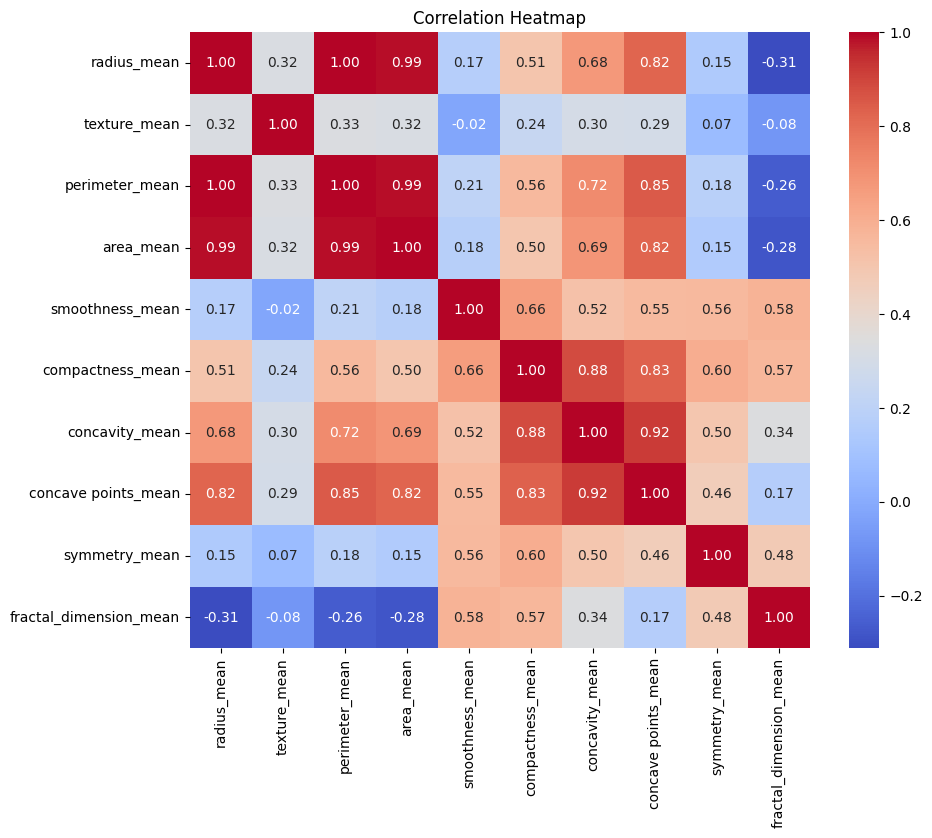

In [17]:
#Compute the correlation matrix for the feature set X
correlation_matrix = x.corr()

# Heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###***General Guidelines***

**1. Spliting the samples into 70% Training and 30% Testing at random.**

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

**2. Build a pipeline using the Standard Scaler and Logistic Regression**

In [20]:
# Create a standardScaler and logistic regression pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Standard Scaler step
    ('log_reg', LogisticRegression())    # Logistic Regression step
])

# Fit the model on the training data
pipeline.fit(x_train, y_train)

# Use the model to predict the values for the test set
y_pred = pipeline.predict(x_test)

**3. Use the default penalty settings of Logistic Regression:**

The default settings of LogisticRegression() is already used by this project. Regularization method is used, which is the default penalty in Logisticegression called 'l2'.

**4. Model’s Training and Testing Accuracy & Feature Importance:**

In [22]:
train_accuracy = pipeline.score(x_train, y_train)   #Training accuracy
test_accuracy = pipeline.score(x_test, y_test)      #Testing accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

# Feature Importance (coefficients of the logistic regression)
feature_importance = pipeline.named_steps['log_reg'].coef_[0]  # Coefficients of Logistic Regression

# Displaying the features with their importance
feature_names = x.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

display(importance_df)

Training Accuracy: 0.9422
Testing Accuracy: 0.9415


,Feature,Importance
7,concave points_mean,1.625637
1,texture_mean,1.472499
3,area_mean,1.264395
4,smoothness_mean,1.132638
0,radius_mean,1.049994
2,perimeter_mean,0.940067
6,concavity_mean,0.785639
8,symmetry_mean,0.397152
9,fractal_dimension_mean,-0.303449
5,compactness_mean,-0.303636


**5. Generate a Confusion Matrix and calculate other metrics (F1-score, Precision, Recall, False alarm rate):**

Confusion Matrix:


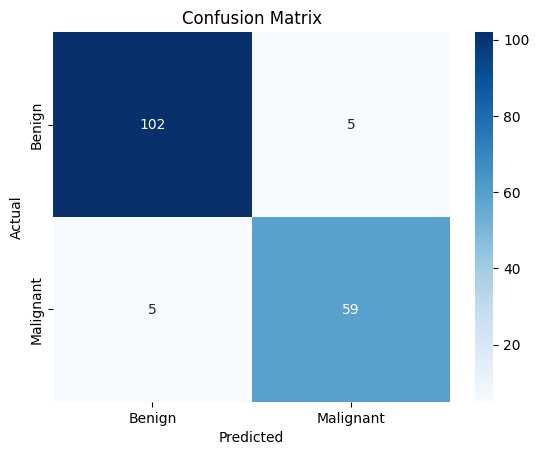

F1-score: 0.9219
Precision: 0.9219
Recall: 0.9219
False Alarm Rate: 0.0781


In [24]:
y_pred = pipeline.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization using heatmap
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate other metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# False Alarm Rate (FAR) = FP / (FP + TN)
false_alarm_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])

print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Alarm Rate: {false_alarm_rate:.4f}")

**6. Plot the ROC Curve and report the AUC (Training and Testing data):**

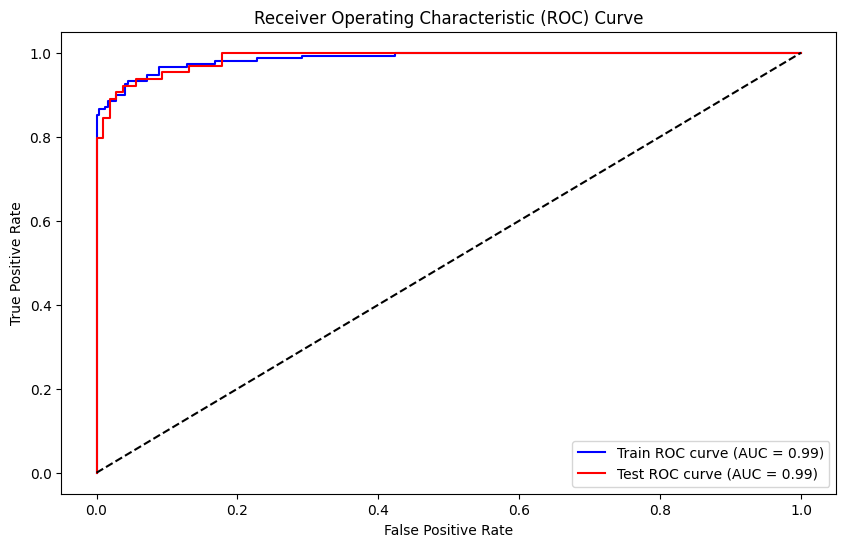

Training AUC: 0.9868
Testing AUC: 0.9877


In [25]:
# For Training Data
y_train_prob = pipeline.predict_proba(x_train)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)

# For Testing Data
y_test_prob = pipeline.predict_proba(x_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {roc_auc_score(y_train, y_train_prob):.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (AUC = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# AUC for both training and testing
print(f"Training AUC: {roc_auc_score(y_train, y_train_prob):.4f}")
print(f"Testing AUC: {roc_auc_score(y_test, y_test_prob):.4f}")

###***Guide Questions***

## 1. How to remove the “Sample code number” column?

Although the column appears as **"Sample code number"**, it's labeled as **"ID"** in the dataset.

```python
data = data.drop(columns=['ID'])
```

---

## 2. How to convert “Class” values into binary form?

Use `replace()` to map 'M' (Malignant) to 1 and 'B' (Benign) to 0:

```python
data['Class'] = data['Class'].replace({'M': 1, 'B': 0})
```

---

## 3. Why split the dataset into training and testing sets?

Splitting ensures the model is tested on unseen data to evaluate **real-world performance** and helps prevent **overfitting**.

---

## 4. Why use `stratify` in `train_test_split`?

Stratification preserves the original class distribution across both train and test sets, which is crucial when the dataset is **imbalanced**.

```python
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
```

---

## 5. What is logistic regression and why is it suitable?

Logistic Regression is a **binary classification algorithm** that models the probability of class membership. It's ideal here because the output variable has two classes: **Malignant** and **Benign**.

---

## 6. How to calculate training and testing accuracy?

Use the `.score()` method:

```python
train_accuracy = pipeline.score(x_train, y_train)
test_accuracy = pipeline.score(x_test, y_test)
```

---

## 7. Most influential features and how they are assessed?

Top predictors based on weights or feature importance:

- `concave points_mean`: **1.625637**
- `texture_mean`: **1.472499**
- `area_mean`: **1.264395**

These features have higher influence on prediction outcomes.

---

## 8. How is a confusion matrix generated and interpreted?

Generate using:

```python
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
```

It shows:
- **True Positives (TP)**
- **False Positives (FP)**
- **True Negatives (TN)**
- **False Negatives (FN)**

---

## 9. How to compute precision, recall, F1-score, and false alarm rate?

Formulas:
- **Precision** = TP / (TP + FP)
- **Recall** = TP / (TP + FN)
- **F1-score** = 2 * (Precision * Recall) / (Precision + Recall)
- **False Alarm Rate** = FP / (FP + TN)

```python
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
false_alarm_rate = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[1, 1])
```

---

## 10. Why are these metrics important?

- **Precision**: Accuracy of positive predictions
- **Recall**: How well actual positives are identified
- **F1-score**: Balance between precision and recall
- **False Alarm Rate**: How often negatives are incorrectly flagged as positives

---

## 11. What is an ROC curve and how is it plotted?

ROC = Receiver Operating Characteristic curve plots **True Positive Rate vs False Positive Rate**.

```python
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.show()
```

---

## 12. How is AUC calculated and what does it mean?

**AUC** = Area Under the Curve. It indicates model performance:

- AUC ~1 → Excellent
- AUC ~0.5 → No better than random

```python
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_prob)
```

---

## 13. How to interpret training vs. testing ROC curves?

Compare the curves:
- If **training ROC >> testing ROC** → possible **overfitting**
- If both curves are **similar** → model generalizes well

---

## 14. Challenges and how they were resolved

**Issue**: Dataset loaded via `ucimlrepo` lacked proper column names.

**Solution**:
- Manually downloaded `.data` file
- Converted to `.csv`
- Added headers from Kaggle
- Manually grouped features by `mean`, `SE`, and `worst`

---

## 15. How to improve poor model performance?

- Tune hyperparameters
- Normalize or engineer features
- Try advanced models (SVM, Decision Trees)
- Use more data or class-balancing techniques (e.g., SMOTE)

---